In [1]:
%pip install pandas networkx scipy loguru sklearn autograd openpyxl

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os 
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from copy import deepcopy
from scipy.spatial.distance import pdist
import itertools as it 
os.chdir('..')
from src.data_cleaning import *
from src.autograd_mds import *
from autograd import grad, elementwise_grad 
from loguru import logger
import sys

from matplotlib.collections import LineCollection

from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA
from sklearn.utils import check_random_state
from sklearn.manifold import MDS
# Unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
import warnings


In [3]:


EPSILON = np.finfo(np.float32).eps
n_samples = 20
seed = np.random.RandomState(seed=3)
X_true = seed.randint(0, 20, 2 * n_samples).astype(float)
X_true = X_true.reshape((n_samples, 2))
# Center the data
X_true -= X_true.mean()

similarities = euclidean_distances(X_true)

# Add noise to the similarities
noise = np.random.rand(n_samples, n_samples)
noise = noise + noise.T
noise[np.arange(noise.shape[0]), np.arange(noise.shape[0])] = 0
similarities += noise
nmds = manifold.MDS(
    n_components=2,
    metric=False,
    max_iter=3000,
    eps=1e-12,
    dissimilarity="precomputed",
    random_state=seed,
    n_jobs=1,
    n_init=100,
)
npos = nmds.fit_transform(similarities)


In [4]:
similarity_vec = np.tril(similarities, -1)
similarity_vec = similarity_vec[np.nonzero(similarity_vec)]
dissimilarities = np.exp(-1*similarity_vec)
dissimilarities/= np.linalg.norm(dissimilarities)

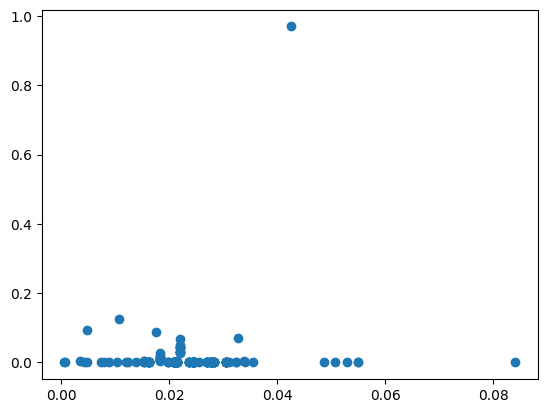

2022-08-26 05:27:49.407 | INFO     | src.autograd_mds:apply_mean:165 - PRED_DIS_OUT:
2022-08-26 05:27:49.409 | INFO     | src.autograd_mds:apply_mean:166 - [0.007852997446468665, 0.00882944313520753, 0.013792219207238415, 0.021395855673646855, 0.021395855673646855, 0.021395855673646855, 0.021395855673646855, 0.021395855673646855, 0.021395855673646855, 0.021395855673646855, 0.021395855673646855, 0.021395855673646855, 0.021395855673646855, 0.021395855673646855, 0.021395855673646855, 0.032422546904604374, 0.05283343046503777, 0.004170248552672504, 0.015307047492288941, 0.015307047492288941, 0.015307047492288941, 0.01625750411786215, 0.01625750411786215, 0.01625750411786215, 0.01625750411786215, 0.01625750411786215, 0.01625750411786215, 0.01625750411786215, 0.01625750411786215, 0.01625750411786215, 0.01625750411786215, 0.031045949700043853, 0.0006782403437981417, 0.0005205354589517343, 0.007365600935755654, 0.019651248070369273, 0.019651248070369273, 0.019651248070369273, 0.030425327431383

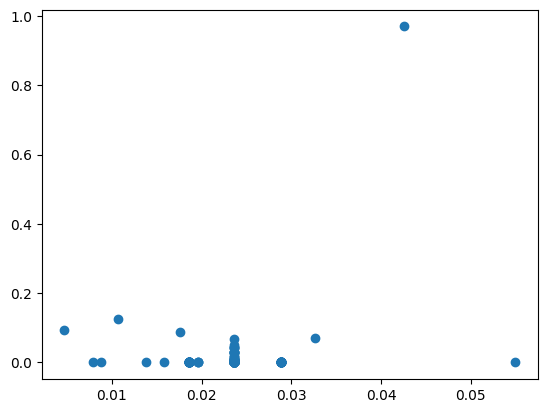

2022-08-26 05:27:49.617 | INFO     | src.autograd_mds:apply_mean:165 - PRED_DIS_OUT:
2022-08-26 05:27:49.619 | INFO     | src.autograd_mds:apply_mean:166 - [0.007852997446468665, 0.00882944313520753, 0.013792219207238415, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.019651248070369273, 0.019651248070369273, 0.019651248070369273, 0.028869364524056276, 0.0288693645240562

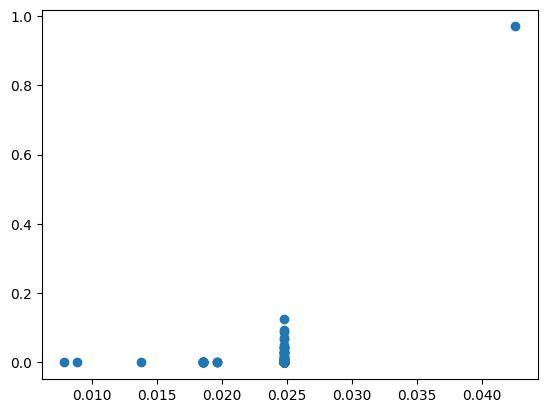

2022-08-26 05:27:49.783 | INFO     | src.autograd_mds:apply_mean:165 - PRED_DIS_OUT:
2022-08-26 05:27:49.784 | INFO     | src.autograd_mds:apply_mean:166 - [0.007852997446468665, 0.00882944313520753, 0.013792219207238415, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.01857134387812858, 0.019651248070369273, 0.019651248070369273, 0.019651248070369273, 0.024760832505860565, 0.0247608325058605

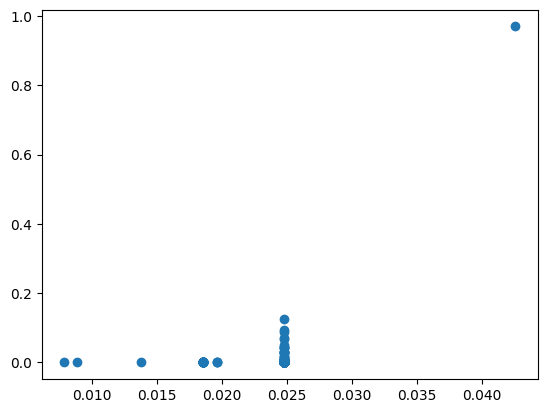

2022-08-26 05:27:49.932 | INFO     | src.autograd_mds:run_monoreg:194 - FIRST DIFFS:
[0.0009764456887388657, 0.004962776072030885, 0.0047791246708901655, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0010799041922406917, 0.0, 0.0, 0.005109584435491293, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

Sstar: 0.9734273561256467
Tstar: 0.9999999999999998
stress: 0.9866242223489381
Sstar: Autograd ArrayBox with value 1.0513432663615239
Tstar: 0.9999999999999998


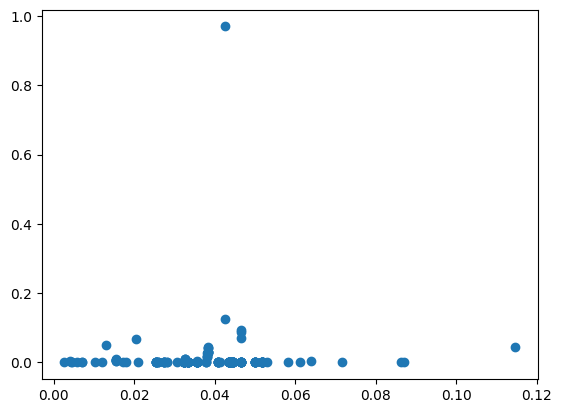

2022-08-26 05:27:50.469 | INFO     | src.autograd_mds:apply_mean:165 - PRED_DIS_OUT:
2022-08-26 05:27:50.470 | INFO     | src.autograd_mds:apply_mean:166 - [0.004529676078522445, 0.04449619046041329, 0.04449619046041329, 0.04449619046041329, 0.04449619046041329, 0.04449619046041329, 0.04449619046041329, 0.05190395907723883, 0.006975488419491423, 0.04366846497380453, 0.04366846497380453, 0.04366846497380453, 0.04366846497380453, 0.04366846497380453, 0.04366846497380453, 0.04366846497380453, 0.04366846497380453, 0.04366846497380453, 0.04366846497380453, 0.04366846497380453, 0.04366846497380453, 0.04366846497380453, 0.04366846497380453, 0.04366846497380453, 0.04366846497380453, 0.04366846497380453, 0.04366846497380453, 0.04427785188922294, 0.04427785188922294, 0.04427785188922294, 0.04427785188922294, 0.04427785188922294, 0.04427785188922294, 0.04427785188922294, 0.04427785188922294, 0.04427785188922294, 0.04427785188922294, 0.04427785188922294, 0.04427785188922294, 0.04427785188922294, 0

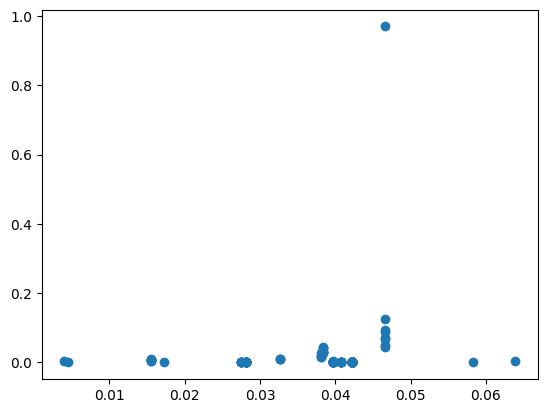

2022-08-26 05:27:50.704 | INFO     | src.autograd_mds:apply_mean:165 - PRED_DIS_OUT:
2022-08-26 05:27:50.705 | INFO     | src.autograd_mds:apply_mean:166 - [0.004529676078522445, 0.04073207378240124, 0.04073207378240124, 0.04073207378240124, 0.04073207378240124, 0.04073207378240124, 0.04073207378240124, 0.04073207378240124, 0.04073207378240124, 0.04225983478378654, 0.04225983478378654, 0.04225983478378654, 0.04225983478378654, 0.04225983478378654, 0.04225983478378654, 0.04225983478378654, 0.04225983478378654, 0.04225983478378654, 0.04225983478378654, 0.04225983478378654, 0.04225983478378654, 0.04225983478378654, 0.04225983478378654, 0.04225983478378654, 0.04225983478378654, 0.04225983478378654, 0.04225983478378654, 0.04225983478378654, 0.04225983478378654, 0.04225983478378654, 0.04225983478378654, 0.04225983478378654, 0.04225983478378654, 0.04225983478378654, 0.04225983478378654, 0.04225983478378654, 0.04225983478378654, 0.04225983478378654, 0.04225983478378654, 0.04225983478378654, 0.

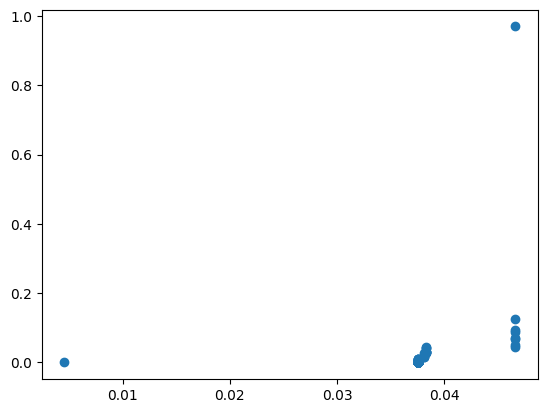

2022-08-26 05:27:50.915 | INFO     | src.autograd_mds:apply_mean:165 - PRED_DIS_OUT:
2022-08-26 05:27:50.916 | INFO     | src.autograd_mds:apply_mean:166 - [0.004529676078522445, 0.03759149377119741, 0.03759149377119741, 0.03759149377119741, 0.03759149377119741, 0.03759149377119741, 0.03759149377119741, 0.03759149377119741, 0.03759149377119741, 0.03759149377119741, 0.03759149377119741, 0.03759149377119741, 0.03759149377119741, 0.03759149377119741, 0.03759149377119741, 0.03759149377119741, 0.03759149377119741, 0.03759149377119741, 0.03759149377119741, 0.03759149377119741, 0.03759149377119741, 0.03759149377119741, 0.03759149377119741, 0.03759149377119741, 0.03759149377119741, 0.03759149377119741, 0.03759149377119741, 0.03759149377119741, 0.03759149377119741, 0.03759149377119741, 0.03759149377119741, 0.03759149377119741, 0.03759149377119741, 0.03759149377119741, 0.03759149377119741, 0.03759149377119741, 0.03759149377119741, 0.03759149377119741, 0.03759149377119741, 0.03759149377119741, 0.

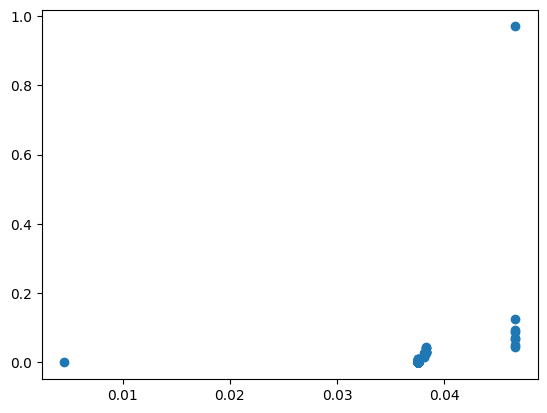

2022-08-26 05:27:51.114 | INFO     | src.autograd_mds:run_monoreg:194 - FIRST DIFFS:
[0.033061817692674966, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0004956181617602751, 0.0, 0.0, 0.0, 0.000236224127

Sstar: 1.095730104865617
Tstar: 0.9999999999999998
stress: 1.0467712762899148
Sstar: Autograd ArrayBox with value 1.3246454701841304
Tstar: 0.9999999999999998


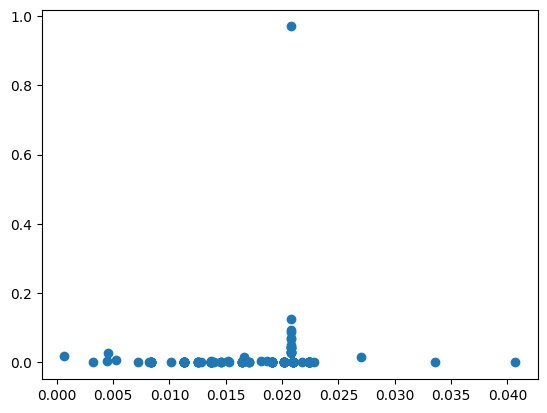

2022-08-26 05:27:51.866 | INFO     | src.autograd_mds:apply_mean:165 - PRED_DIS_OUT:
2022-08-26 05:27:51.867 | INFO     | src.autograd_mds:apply_mean:166 - [0.021777478633241667, 0.022353238525316402, 0.022353238525316402, 0.022353238525316402, 0.022353238525316402, 0.022353238525316402, 0.022353238525316402, 0.022353238525316402, 0.022353238525316402, 0.022353238525316402, 0.022353238525316402, 0.022353238525316402, 0.022353238525316402, 0.022353238525316402, 0.022353238525316402, 0.022353238525316402, 0.022353238525316402, 0.02249930118547196, 0.04069550027361018, 0.022488029749695024, 0.013947818895786803, 0.02100890372610894, 0.02100890372610894, 0.02100890372610894, 0.02100890372610894, 0.02100890372610894, 0.02100890372610894, 0.02100890372610894, 0.02100890372610894, 0.02100890372610894, 0.02100890372610894, 0.02100890372610894, 0.02100890372610894, 0.02100890372610894, 0.022422012703362793, 0.003185544351805575, 0.008390647897387719, 0.008390647897387719, 0.008390647897387719, 

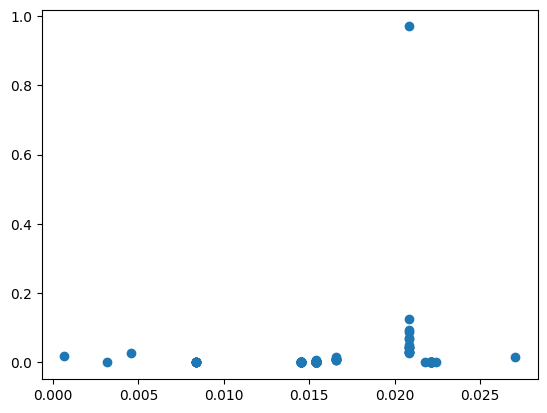

2022-08-26 05:27:52.107 | INFO     | src.autograd_mds:apply_mean:165 - PRED_DIS_OUT:
2022-08-26 05:27:52.109 | INFO     | src.autograd_mds:apply_mean:166 - [0.021777478633241667, 0.02213327924088008, 0.02213327924088008, 0.02213327924088008, 0.02213327924088008, 0.02213327924088008, 0.02213327924088008, 0.02213327924088008, 0.02213327924088008, 0.02213327924088008, 0.02213327924088008, 0.02213327924088008, 0.02213327924088008, 0.02213327924088008, 0.02213327924088008, 0.02213327924088008, 0.02213327924088008, 0.02213327924088008, 0.02213327924088008, 0.02213327924088008, 0.02213327924088008, 0.02213327924088008, 0.02213327924088008, 0.02213327924088008, 0.02213327924088008, 0.02213327924088008, 0.02213327924088008, 0.02213327924088008, 0.02213327924088008, 0.02213327924088008, 0.02213327924088008, 0.02213327924088008, 0.02213327924088008, 0.02213327924088008, 0.022422012703362793, 0.003185544351805575, 0.008390647897387719, 0.008390647897387719, 0.008390647897387719, 0.0083906478973877

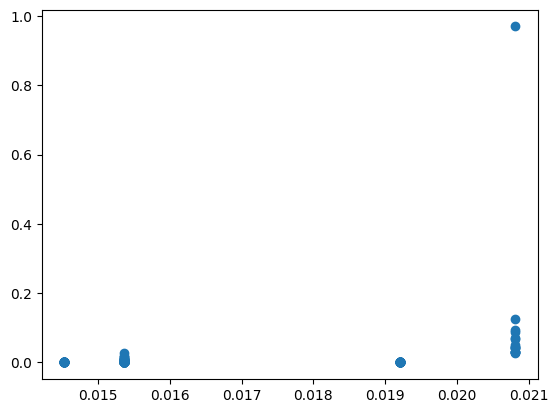

2022-08-26 05:27:52.399 | INFO     | src.autograd_mds:apply_mean:165 - PRED_DIS_OUT:
2022-08-26 05:27:52.400 | INFO     | src.autograd_mds:apply_mean:166 - [0.019202464404921685, 0.019202464404921685, 0.019202464404921685, 0.019202464404921685, 0.019202464404921685, 0.019202464404921685, 0.019202464404921685, 0.019202464404921685, 0.019202464404921685, 0.019202464404921685, 0.019202464404921685, 0.019202464404921685, 0.019202464404921685, 0.019202464404921685, 0.019202464404921685, 0.019202464404921685, 0.019202464404921685, 0.019202464404921685, 0.019202464404921685, 0.019202464404921685, 0.019202464404921685, 0.019202464404921685, 0.019202464404921685, 0.019202464404921685, 0.019202464404921685, 0.019202464404921685, 0.019202464404921685, 0.019202464404921685, 0.019202464404921685, 0.019202464404921685, 0.019202464404921685, 0.019202464404921685, 0.019202464404921685, 0.019202464404921685, 0.019202464404921685, 0.019202464404921685, 0.019202464404921685, 0.019202464404921685, 0.01920

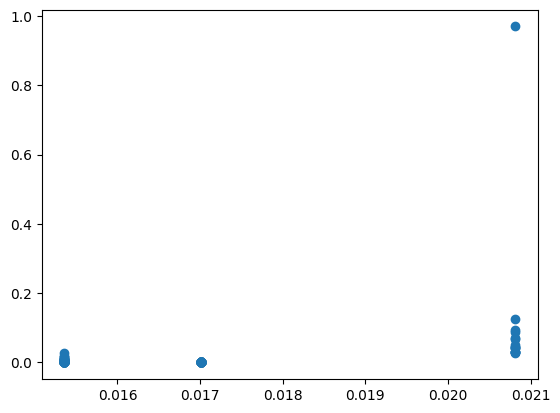

2022-08-26 05:27:52.714 | INFO     | src.autograd_mds:apply_mean:165 - PRED_DIS_OUT:
2022-08-26 05:27:52.715 | INFO     | src.autograd_mds:apply_mean:166 - [0.01700544694989818, 0.01700544694989818, 0.01700544694989818, 0.01700544694989818, 0.01700544694989818, 0.01700544694989818, 0.01700544694989818, 0.01700544694989818, 0.01700544694989818, 0.01700544694989818, 0.01700544694989818, 0.01700544694989818, 0.01700544694989818, 0.01700544694989818, 0.01700544694989818, 0.01700544694989818, 0.01700544694989818, 0.01700544694989818, 0.01700544694989818, 0.01700544694989818, 0.01700544694989818, 0.01700544694989818, 0.01700544694989818, 0.01700544694989818, 0.01700544694989818, 0.01700544694989818, 0.01700544694989818, 0.01700544694989818, 0.01700544694989818, 0.01700544694989818, 0.01700544694989818, 0.01700544694989818, 0.01700544694989818, 0.01700544694989818, 0.01700544694989818, 0.01700544694989818, 0.01700544694989818, 0.01700544694989818, 0.01700544694989818, 0.01700544694989818, 0.0

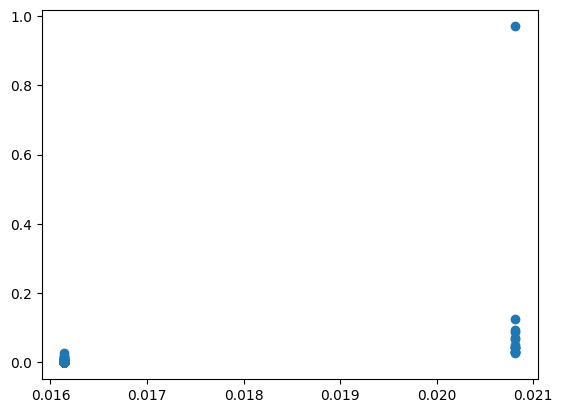

2022-08-26 05:27:52.891 | INFO     | src.autograd_mds:apply_mean:165 - PRED_DIS_OUT:
2022-08-26 05:27:52.892 | INFO     | src.autograd_mds:apply_mean:166 - [0.016142801162263642, 0.016142801162263642, 0.016142801162263642, 0.016142801162263642, 0.016142801162263642, 0.016142801162263642, 0.016142801162263642, 0.016142801162263642, 0.016142801162263642, 0.016142801162263642, 0.016142801162263642, 0.016142801162263642, 0.016142801162263642, 0.016142801162263642, 0.016142801162263642, 0.016142801162263642, 0.016142801162263642, 0.016142801162263642, 0.016142801162263642, 0.016142801162263642, 0.016142801162263642, 0.016142801162263642, 0.016142801162263642, 0.016142801162263642, 0.016142801162263642, 0.016142801162263642, 0.016142801162263642, 0.016142801162263642, 0.016142801162263642, 0.016142801162263642, 0.016142801162263642, 0.016142801162263642, 0.016142801162263642, 0.016142801162263642, 0.016142801162263642, 0.016142801162263642, 0.016142801162263642, 0.016142801162263642, 0.01614

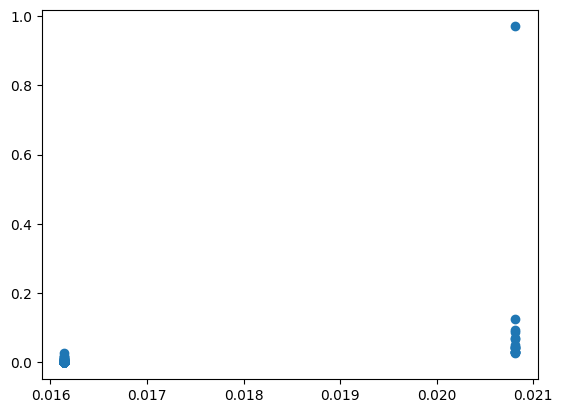

2022-08-26 05:27:53.057 | INFO     | src.autograd_mds:run_monoreg:194 - FIRST DIFFS:
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.004671344242927821, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

Sstar: 0.9710399326326528
Tstar: 0.9999999999999998
stress: 0.9854135845586122
Sstar: Autograd ArrayBox with value 1.0452459662686044
Tstar: 0.9999999999999998


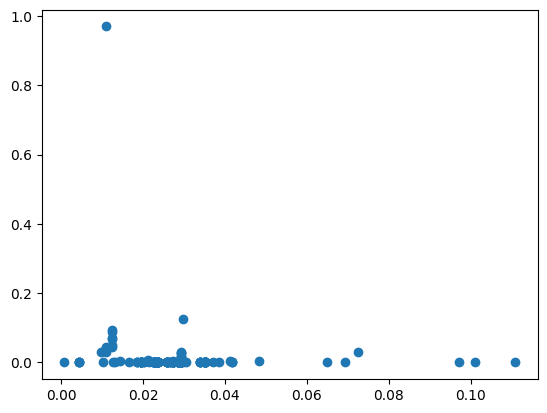

2022-08-26 05:27:53.658 | INFO     | src.autograd_mds:apply_mean:165 - PRED_DIS_OUT:
2022-08-26 05:27:53.660 | INFO     | src.autograd_mds:apply_mean:166 - [0.02328201447289648, 0.02328201447289648, 0.02328201447289648, 0.02328201447289648, 0.02328201447289648, 0.03503388896156547, 0.03503388896156547, 0.03503388896156547, 0.03503388896156547, 0.03503388896156547, 0.03503388896156547, 0.03503388896156547, 0.03503388896156547, 0.03503388896156547, 0.03503388896156547, 0.03503388896156547, 0.03503388896156547, 0.10093822550018557, 0.023624458041662983, 0.02866215962488177, 0.02866215962488177, 0.02866215962488177, 0.02866215962488177, 0.02866215962488177, 0.02866215962488177, 0.02866215962488177, 0.02866215962488177, 0.0417512326205973, 0.0417512326205973, 0.0417512326205973, 0.09708254862475152, 0.0044069322974129976, 0.029262474848011255, 0.029262474848011255, 0.029262474848011255, 0.029262474848011255, 0.029262474848011255, 0.029262474848011255, 0.029262474848011255, 0.029262474848011

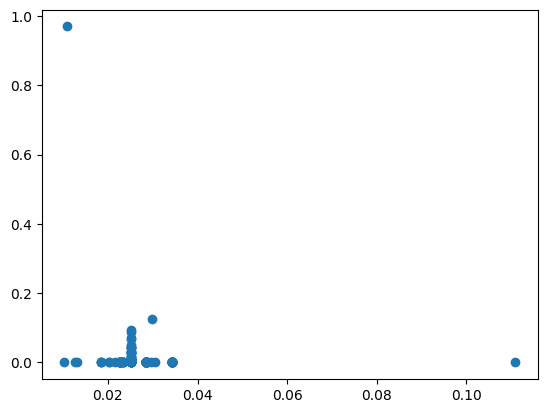

2022-08-26 05:27:54.062 | INFO     | src.autograd_mds:apply_mean:165 - PRED_DIS_OUT:
2022-08-26 05:27:54.063 | INFO     | src.autograd_mds:apply_mean:166 - [0.02328201447289648, 0.02328201447289648, 0.02328201447289648, 0.02328201447289648, 0.02328201447289648, 0.03428445070437651, 0.03428445070437651, 0.03428445070437651, 0.03428445070437651, 0.03428445070437651, 0.03428445070437651, 0.03428445070437651, 0.03428445070437651, 0.03428445070437651, 0.03428445070437651, 0.03428445070437651, 0.03428445070437651, 0.03428445070437651, 0.03428445070437651, 0.03428445070437651, 0.03428445070437651, 0.03428445070437651, 0.03428445070437651, 0.03428445070437651, 0.03428445070437651, 0.03428445070437651, 0.03428445070437651, 0.03428445070437651, 0.03428445070437651, 0.03428445070437651, 0.03428445070437651, 0.03428445070437651, 0.03428445070437651, 0.03428445070437651, 0.03428445070437651, 0.03428445070437651, 0.03428445070437651, 0.03428445070437651, 0.03428445070437651, 0.03428445070437651, 0.0

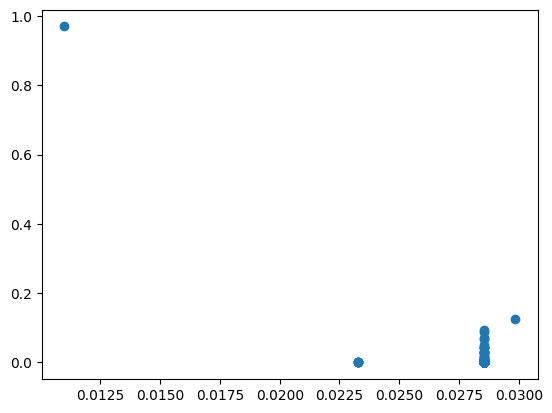

2022-08-26 05:27:54.297 | INFO     | src.autograd_mds:apply_mean:165 - PRED_DIS_OUT:
2022-08-26 05:27:54.299 | INFO     | src.autograd_mds:apply_mean:166 - [0.02328201447289648, 0.02328201447289648, 0.02328201447289648, 0.02328201447289648, 0.02328201447289648, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.0285581393

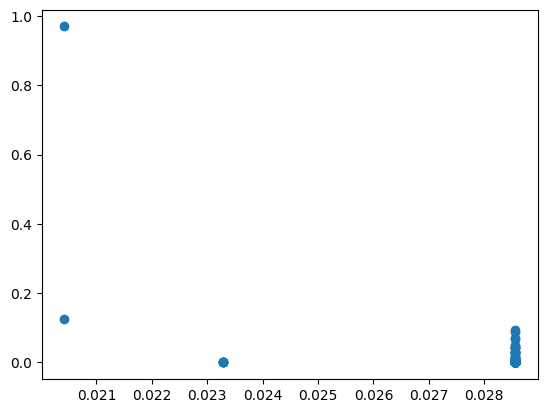

2022-08-26 05:27:54.504 | INFO     | src.autograd_mds:apply_mean:165 - PRED_DIS_OUT:
2022-08-26 05:27:54.505 | INFO     | src.autograd_mds:apply_mean:166 - [0.02328201447289648, 0.02328201447289648, 0.02328201447289648, 0.02328201447289648, 0.02328201447289648, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.028558139357860727, 0.0285581393

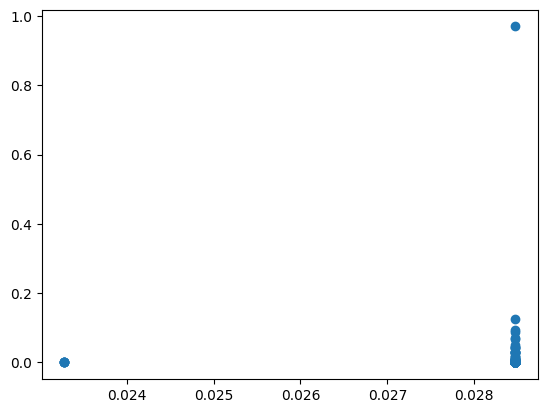

2022-08-26 05:27:54.674 | INFO     | src.autograd_mds:apply_mean:165 - PRED_DIS_OUT:
2022-08-26 05:27:54.676 | INFO     | src.autograd_mds:apply_mean:166 - [0.02328201447289648, 0.02328201447289648, 0.02328201447289648, 0.02328201447289648, 0.02328201447289648, 0.028470139978871885, 0.028470139978871885, 0.028470139978871885, 0.028470139978871885, 0.028470139978871885, 0.028470139978871885, 0.028470139978871885, 0.028470139978871885, 0.028470139978871885, 0.028470139978871885, 0.028470139978871885, 0.028470139978871885, 0.028470139978871885, 0.028470139978871885, 0.028470139978871885, 0.028470139978871885, 0.028470139978871885, 0.028470139978871885, 0.028470139978871885, 0.028470139978871885, 0.028470139978871885, 0.028470139978871885, 0.028470139978871885, 0.028470139978871885, 0.028470139978871885, 0.028470139978871885, 0.028470139978871885, 0.028470139978871885, 0.028470139978871885, 0.028470139978871885, 0.028470139978871885, 0.028470139978871885, 0.028470139978871885, 0.0284701399

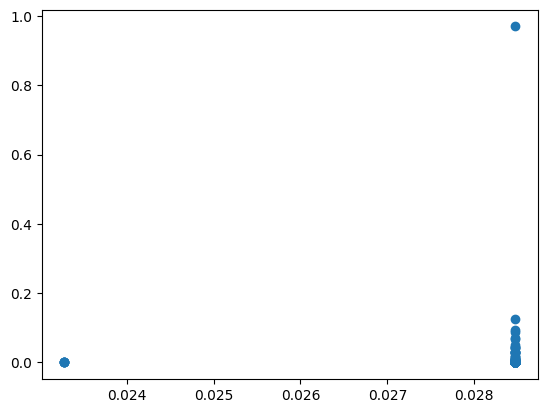

2022-08-26 05:27:54.809 | INFO     | src.autograd_mds:run_monoreg:194 - FIRST DIFFS:
[0.0, 0.0, 0.0, 0.0, 0.005188125505975406, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

Sstar: 1.0389037576507694
Tstar: 0.9999999999999998
stress: 1.0192662839762578
Sstar: Autograd ArrayBox with value 1.206495903410565
Tstar: 0.9999999999999998


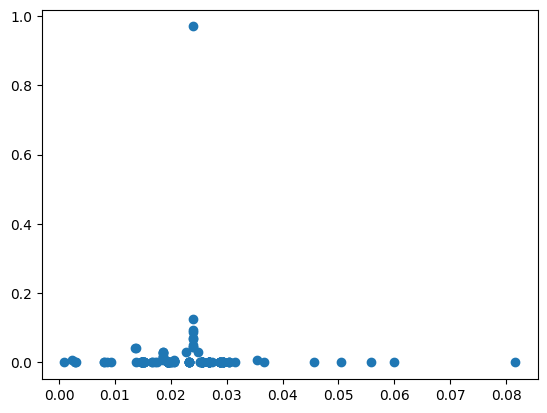

2022-08-26 05:27:55.599 | INFO     | src.autograd_mds:apply_mean:165 - PRED_DIS_OUT:
2022-08-26 05:27:55.608 | INFO     | src.autograd_mds:apply_mean:166 - [0.0028079706400639254, 0.01479044710545929, 0.01479044710545929, 0.01479044710545929, 0.01479044710545929, 0.01479044710545929, 0.01479044710545929, 0.01479044710545929, 0.01479044710545929, 0.01479044710545929, 0.01479044710545929, 0.01479044710545929, 0.01479044710545929, 0.01479044710545929, 0.028733939907005058, 0.028733939907005058, 0.028733939907005058, 0.028733939907005058, 0.028733939907005058, 0.028733939907005058, 0.028733939907005058, 0.028733939907005058, 0.05574270024153609, 0.017126424146111256, 0.019957018892305632, 0.019957018892305632, 0.023324337356105097, 0.023324337356105097, 0.023324337356105097, 0.023324337356105097, 0.023324337356105097, 0.023324337356105097, 0.023324337356105097, 0.026809462154062456, 0.026809462154062456, 0.026809462154062456, 0.026809462154062456, 0.026809462154062456, 0.026809462154062456

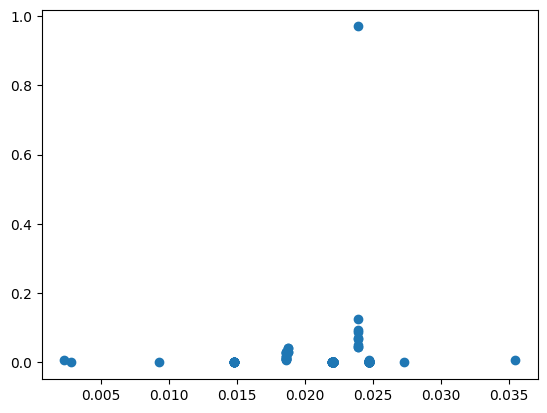

2022-08-26 05:27:55.886 | INFO     | src.autograd_mds:apply_mean:165 - PRED_DIS_OUT:
2022-08-26 05:27:55.887 | INFO     | src.autograd_mds:apply_mean:166 - [0.0028079706400639254, 0.01479044710545929, 0.01479044710545929, 0.01479044710545929, 0.01479044710545929, 0.01479044710545929, 0.01479044710545929, 0.01479044710545929, 0.01479044710545929, 0.01479044710545929, 0.01479044710545929, 0.01479044710545929, 0.01479044710545929, 0.01479044710545929, 0.022099863380242748, 0.022099863380242748, 0.022099863380242748, 0.022099863380242748, 0.022099863380242748, 0.022099863380242748, 0.022099863380242748, 0.022099863380242748, 0.022099863380242748, 0.022099863380242748, 0.022099863380242748, 0.022099863380242748, 0.022099863380242748, 0.022099863380242748, 0.022099863380242748, 0.022099863380242748, 0.022099863380242748, 0.022099863380242748, 0.022099863380242748, 0.022099863380242748, 0.022099863380242748, 0.022099863380242748, 0.022099863380242748, 0.022099863380242748, 0.02209986338024274

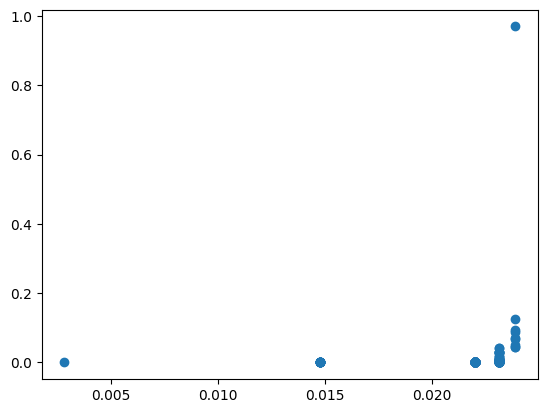

2022-08-26 05:27:56.121 | INFO     | src.autograd_mds:apply_mean:165 - PRED_DIS_OUT:
2022-08-26 05:27:56.122 | INFO     | src.autograd_mds:apply_mean:166 - [0.0028079706400639254, 0.01479044710545929, 0.01479044710545929, 0.01479044710545929, 0.01479044710545929, 0.01479044710545929, 0.01479044710545929, 0.01479044710545929, 0.01479044710545929, 0.01479044710545929, 0.01479044710545929, 0.01479044710545929, 0.01479044710545929, 0.01479044710545929, 0.022014437216514058, 0.022014437216514058, 0.022014437216514058, 0.022014437216514058, 0.022014437216514058, 0.022014437216514058, 0.022014437216514058, 0.022014437216514058, 0.022014437216514058, 0.022014437216514058, 0.022014437216514058, 0.022014437216514058, 0.022014437216514058, 0.022014437216514058, 0.022014437216514058, 0.022014437216514058, 0.022014437216514058, 0.022014437216514058, 0.022014437216514058, 0.022014437216514058, 0.022014437216514058, 0.022014437216514058, 0.022014437216514058, 0.022014437216514058, 0.02201443721651405

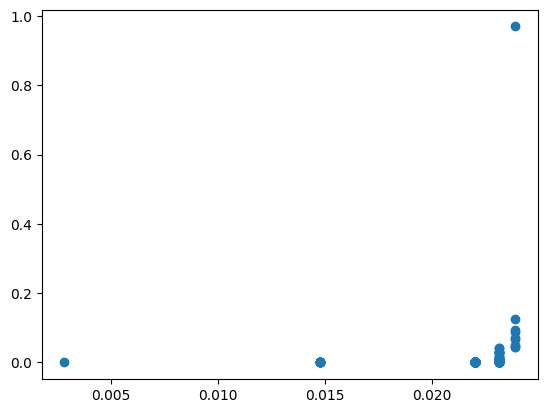

2022-08-26 05:27:56.332 | INFO     | src.autograd_mds:run_monoreg:194 - FIRST DIFFS:
[0.011982476465395365, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.007223990111054767, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.677591965315645e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0011167952669016747, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

Sstar: 0.9975513933921326
Tstar: 0.9999999999999998
stress: 0.9987749463178043
Sstar: Autograd ArrayBox with value 1.105923672143446
Tstar: 0.9999999999999998


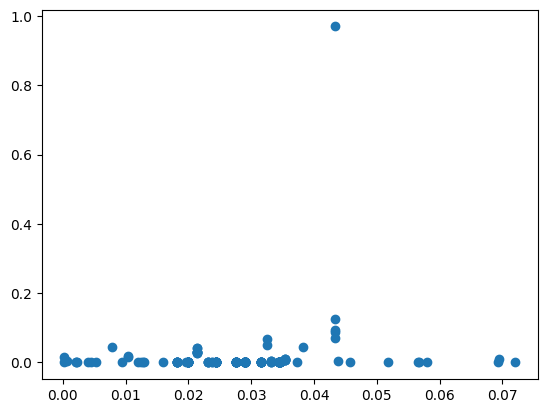

2022-08-26 05:27:57.111 | INFO     | src.autograd_mds:apply_mean:165 - PRED_DIS_OUT:
2022-08-26 05:27:57.112 | INFO     | src.autograd_mds:apply_mean:166 - [0.023786111763882466, 0.023786111763882466, 0.024463406451969486, 0.024463406451969486, 0.024463406451969486, 0.024463406451969486, 0.024463406451969486, 0.024463406451969486, 0.024463406451969486, 0.024463406451969486, 0.024463406451969486, 0.024463406451969486, 0.024463406451969486, 0.024463406451969486, 0.024463406451969486, 0.024463406451969486, 0.024463406451969486, 0.024463406451969486, 0.069290387893676, 0.03722961417639972, 0.00025046591485402767, 0.01200458477251167, 0.019897715120529826, 0.019897715120529826, 0.019897715120529826, 0.019897715120529826, 0.019897715120529826, 0.019897715120529826, 0.019897715120529826, 0.019897715120529826, 0.019897715120529826, 0.019897715120529826, 0.019897715120529826, 0.019897715120529826, 0.019897715120529826, 0.03454236456262068, 0.012939045818443217, 0.00446628063304305, 0.0094856059

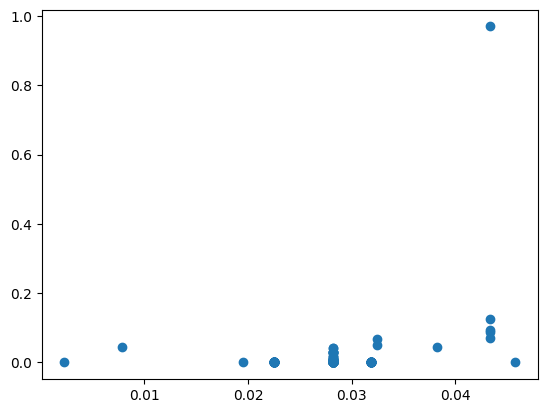

2022-08-26 05:27:57.341 | INFO     | src.autograd_mds:apply_mean:165 - PRED_DIS_OUT:
2022-08-26 05:27:57.342 | INFO     | src.autograd_mds:apply_mean:166 - [0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.02250

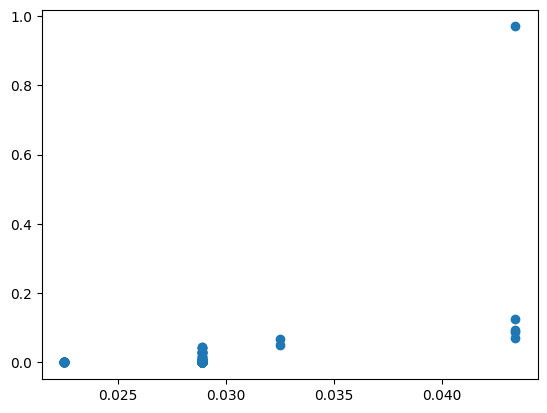

2022-08-26 05:27:57.515 | INFO     | src.autograd_mds:apply_mean:165 - PRED_DIS_OUT:
2022-08-26 05:27:57.516 | INFO     | src.autograd_mds:apply_mean:166 - [0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.022509368539503204, 0.02250

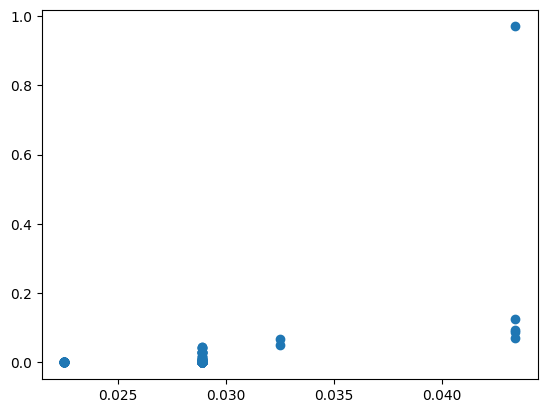

2022-08-26 05:27:57.659 | INFO     | src.autograd_mds:run_monoreg:194 - FIRST DIFFS:
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0063982610062347164, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

Sstar: 0.9961253964466928
Tstar: 0.9999999999999998
stress: 0.9980608180099513
Sstar: Autograd ArrayBox with value 1.1341546429103695
Tstar: 0.9999999999999998


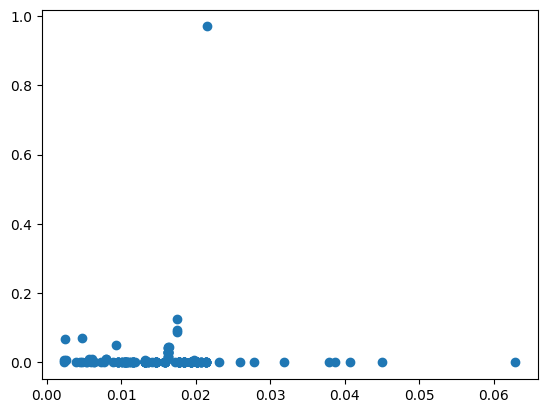

2022-08-26 05:27:58.193 | INFO     | src.autograd_mds:apply_mean:165 - PRED_DIS_OUT:
2022-08-26 05:27:58.194 | INFO     | src.autograd_mds:apply_mean:166 - [0.015876982797910427, 0.015876982797910427, 0.015876982797910427, 0.015876982797910427, 0.015876982797910427, 0.015876982797910427, 0.015876982797910427, 0.04499211234023981, 0.011929959444025392, 0.0024066577778947412, 0.006386995818267656, 0.006386995818267656, 0.007340810522231818, 0.009528350332000758, 0.009528350332000758, 0.009528350332000758, 0.009528350332000758, 0.009528350332000758, 0.009528350332000758, 0.011217540915605718, 0.011217540915605718, 0.011635522701219038, 0.011635522701219038, 0.011635522701219038, 0.011635522701219038, 0.011635522701219038, 0.011635522701219038, 0.011635522701219038, 0.01779003424843748, 0.005313989621331339, 0.01317100551487818, 0.01317100551487818, 0.01317100551487818, 0.01317100551487818, 0.01317100551487818, 0.01317100551487818, 0.01317100551487818, 0.01317100551487818, 0.01317100551487

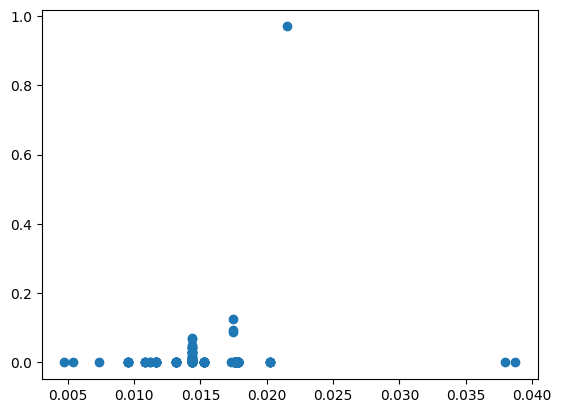

2022-08-26 05:27:58.697 | INFO     | src.autograd_mds:apply_mean:165 - PRED_DIS_OUT:
2022-08-26 05:27:58.698 | INFO     | src.autograd_mds:apply_mean:166 - [0.015270133398672356, 0.015270133398672356, 0.015270133398672356, 0.015270133398672356, 0.015270133398672356, 0.015270133398672356, 0.015270133398672356, 0.015270133398672356, 0.015270133398672356, 0.015270133398672356, 0.015270133398672356, 0.015270133398672356, 0.007340810522231818, 0.009528350332000758, 0.009528350332000758, 0.009528350332000758, 0.009528350332000758, 0.009528350332000758, 0.009528350332000758, 0.011217540915605718, 0.011217540915605718, 0.011616964753144677, 0.011616964753144677, 0.011616964753144677, 0.011616964753144677, 0.011616964753144677, 0.011616964753144677, 0.011616964753144677, 0.011616964753144677, 0.011616964753144677, 0.01317100551487818, 0.01317100551487818, 0.01317100551487818, 0.01317100551487818, 0.01317100551487818, 0.01317100551487818, 0.01317100551487818, 0.01317100551487818, 0.0131710055148

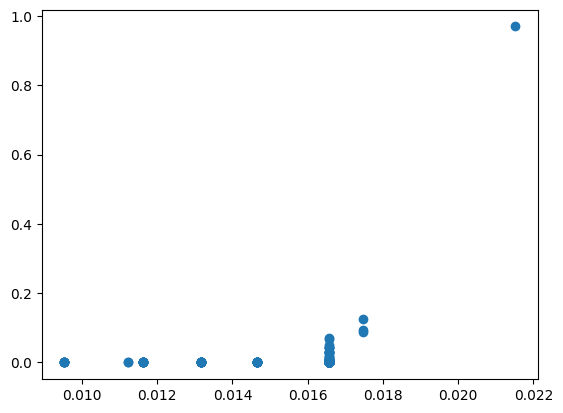

2022-08-26 05:27:58.907 | INFO     | src.autograd_mds:apply_mean:165 - PRED_DIS_OUT:
2022-08-26 05:27:58.908 | INFO     | src.autograd_mds:apply_mean:166 - [0.014660185485100006, 0.014660185485100006, 0.014660185485100006, 0.014660185485100006, 0.014660185485100006, 0.014660185485100006, 0.014660185485100006, 0.014660185485100006, 0.014660185485100006, 0.014660185485100006, 0.014660185485100006, 0.014660185485100006, 0.014660185485100006, 0.009528350332000758, 0.009528350332000758, 0.009528350332000758, 0.009528350332000758, 0.009528350332000758, 0.009528350332000758, 0.011217540915605718, 0.011217540915605718, 0.011616964753144677, 0.011616964753144677, 0.011616964753144677, 0.011616964753144677, 0.011616964753144677, 0.011616964753144677, 0.011616964753144677, 0.011616964753144677, 0.011616964753144677, 0.01317100551487818, 0.01317100551487818, 0.01317100551487818, 0.01317100551487818, 0.01317100551487818, 0.01317100551487818, 0.01317100551487818, 0.01317100551487818, 0.0131710055148

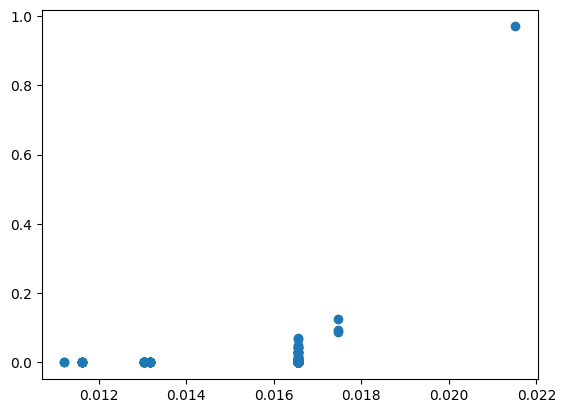

2022-08-26 05:27:59.055 | INFO     | src.autograd_mds:apply_mean:165 - PRED_DIS_OUT:
2022-08-26 05:27:59.056 | INFO     | src.autograd_mds:apply_mean:166 - [0.013039605963068664, 0.013039605963068664, 0.013039605963068664, 0.013039605963068664, 0.013039605963068664, 0.013039605963068664, 0.013039605963068664, 0.013039605963068664, 0.013039605963068664, 0.013039605963068664, 0.013039605963068664, 0.013039605963068664, 0.013039605963068664, 0.013039605963068664, 0.013039605963068664, 0.013039605963068664, 0.013039605963068664, 0.013039605963068664, 0.013039605963068664, 0.011217540915605718, 0.011217540915605718, 0.011616964753144677, 0.011616964753144677, 0.011616964753144677, 0.011616964753144677, 0.011616964753144677, 0.011616964753144677, 0.011616964753144677, 0.011616964753144677, 0.011616964753144677, 0.01317100551487818, 0.01317100551487818, 0.01317100551487818, 0.01317100551487818, 0.01317100551487818, 0.01317100551487818, 0.01317100551487818, 0.01317100551487818, 0.0131710055148

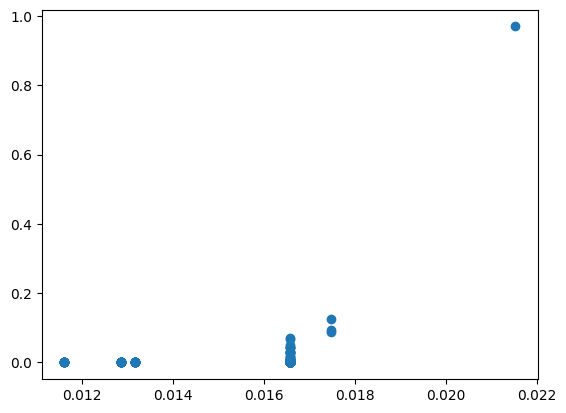

2022-08-26 05:27:59.207 | INFO     | src.autograd_mds:apply_mean:165 - PRED_DIS_OUT:
2022-08-26 05:27:59.209 | INFO     | src.autograd_mds:apply_mean:166 - [0.01286607595854838, 0.01286607595854838, 0.01286607595854838, 0.01286607595854838, 0.01286607595854838, 0.01286607595854838, 0.01286607595854838, 0.01286607595854838, 0.01286607595854838, 0.01286607595854838, 0.01286607595854838, 0.01286607595854838, 0.01286607595854838, 0.01286607595854838, 0.01286607595854838, 0.01286607595854838, 0.01286607595854838, 0.01286607595854838, 0.01286607595854838, 0.01286607595854838, 0.01286607595854838, 0.011616964753144677, 0.011616964753144677, 0.011616964753144677, 0.011616964753144677, 0.011616964753144677, 0.011616964753144677, 0.011616964753144677, 0.011616964753144677, 0.011616964753144677, 0.01317100551487818, 0.01317100551487818, 0.01317100551487818, 0.01317100551487818, 0.01317100551487818, 0.01317100551487818, 0.01317100551487818, 0.01317100551487818, 0.01317100551487818, 0.0131710055148

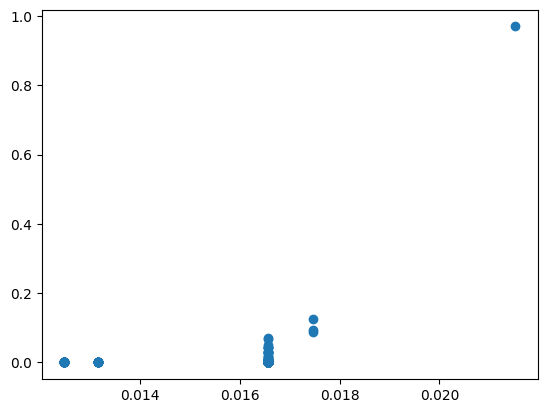

2022-08-26 05:27:59.345 | INFO     | src.autograd_mds:apply_mean:165 - PRED_DIS_OUT:
2022-08-26 05:27:59.346 | INFO     | src.autograd_mds:apply_mean:166 - [0.012491342596927265, 0.012491342596927265, 0.012491342596927265, 0.012491342596927265, 0.012491342596927265, 0.012491342596927265, 0.012491342596927265, 0.012491342596927265, 0.012491342596927265, 0.012491342596927265, 0.012491342596927265, 0.012491342596927265, 0.012491342596927265, 0.012491342596927265, 0.012491342596927265, 0.012491342596927265, 0.012491342596927265, 0.012491342596927265, 0.012491342596927265, 0.012491342596927265, 0.012491342596927265, 0.012491342596927265, 0.012491342596927265, 0.012491342596927265, 0.012491342596927265, 0.012491342596927265, 0.012491342596927265, 0.012491342596927265, 0.012491342596927265, 0.012491342596927265, 0.01317100551487818, 0.01317100551487818, 0.01317100551487818, 0.01317100551487818, 0.01317100551487818, 0.01317100551487818, 0.01317100551487818, 0.01317100551487818, 0.0131710055148

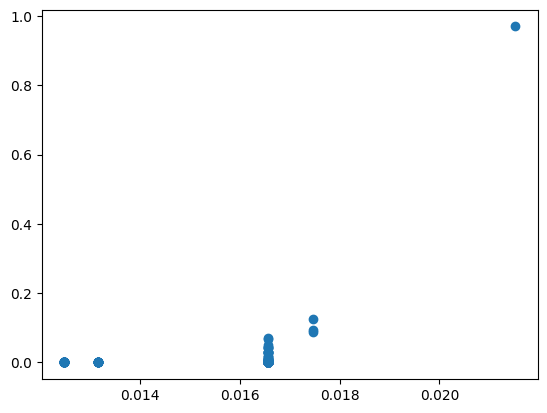

2022-08-26 05:27:59.465 | INFO     | src.autograd_mds:run_monoreg:194 - FIRST DIFFS:
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0006796629179509142, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0033908255499722154, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

Sstar: 0.9711907842995013
Tstar: 0.9999999999999998
stress: 0.9854901238974958
Sstar: Autograd ArrayBox with value 1.0098895630551838
Tstar: 0.9999999999999998


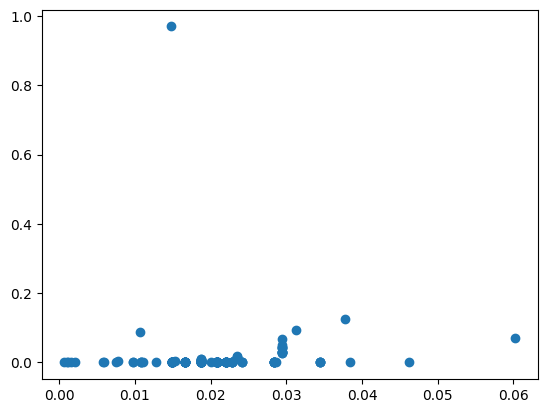

2022-08-26 05:28:00.011 | INFO     | src.autograd_mds:apply_mean:165 - PRED_DIS_OUT:
2022-08-26 05:28:00.012 | INFO     | src.autograd_mds:apply_mean:166 - [0.005934521558706557, 0.010808423052793626, 0.010808423052793626, 0.010808423052793626, 0.020869640812115734, 0.020869640812115734, 0.020869640812115734, 0.020869640812115734, 0.020869640812115734, 0.020869640812115734, 0.020869640812115734, 0.020869640812115734, 0.020869640812115734, 0.020869640812115734, 0.020869640812115734, 0.020869640812115734, 0.020869640812115734, 0.020869640812115734, 0.020869640812115734, 0.020869640812115734, 0.020869640812115734, 0.020869640812115734, 0.020869640812115734, 0.020869640812115734, 0.020869640812115734, 0.020869640812115734, 0.020869640812115734, 0.020869640812115734, 0.020869640812115734, 0.03442747397981787, 0.03442747397981787, 0.03442747397981787, 0.03442747397981787, 0.04626698945287844, 0.009731553282424353, 0.016627786104386196, 0.016627786104386196, 0.016627786104386196, 0.0166277861

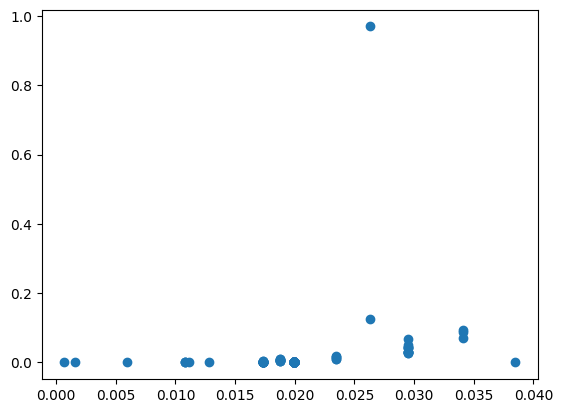

2022-08-26 05:28:00.208 | INFO     | src.autograd_mds:apply_mean:165 - PRED_DIS_OUT:
2022-08-26 05:28:00.209 | INFO     | src.autograd_mds:apply_mean:166 - [0.005934521558706557, 0.010808423052793626, 0.010808423052793626, 0.010808423052793626, 0.019915402207764735, 0.019915402207764735, 0.019915402207764735, 0.019915402207764735, 0.019915402207764735, 0.019915402207764735, 0.019915402207764735, 0.019915402207764735, 0.019915402207764735, 0.019915402207764735, 0.019915402207764735, 0.019915402207764735, 0.019915402207764735, 0.019915402207764735, 0.019915402207764735, 0.019915402207764735, 0.019915402207764735, 0.019915402207764735, 0.019915402207764735, 0.019915402207764735, 0.019915402207764735, 0.019915402207764735, 0.019915402207764735, 0.019915402207764735, 0.019915402207764735, 0.019915402207764735, 0.019915402207764735, 0.019915402207764735, 0.019915402207764735, 0.019915402207764735, 0.019915402207764735, 0.019915402207764735, 0.019915402207764735, 0.019915402207764735, 0.01991

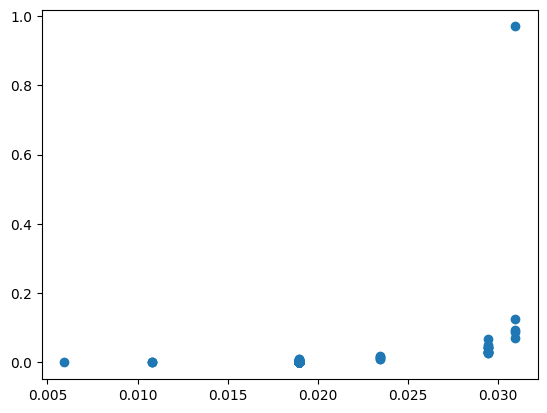

2022-08-26 05:28:00.385 | INFO     | src.autograd_mds:apply_mean:165 - PRED_DIS_OUT:
2022-08-26 05:28:00.386 | INFO     | src.autograd_mds:apply_mean:166 - [0.005934521558706557, 0.010808423052793626, 0.010808423052793626, 0.010808423052793626, 0.0189865753453835, 0.0189865753453835, 0.0189865753453835, 0.0189865753453835, 0.0189865753453835, 0.0189865753453835, 0.0189865753453835, 0.0189865753453835, 0.0189865753453835, 0.0189865753453835, 0.0189865753453835, 0.0189865753453835, 0.0189865753453835, 0.0189865753453835, 0.0189865753453835, 0.0189865753453835, 0.0189865753453835, 0.0189865753453835, 0.0189865753453835, 0.0189865753453835, 0.0189865753453835, 0.0189865753453835, 0.0189865753453835, 0.0189865753453835, 0.0189865753453835, 0.0189865753453835, 0.0189865753453835, 0.0189865753453835, 0.0189865753453835, 0.0189865753453835, 0.0189865753453835, 0.0189865753453835, 0.0189865753453835, 0.0189865753453835, 0.0189865753453835, 0.0189865753453835, 0.0189865753453835, 0.0189865753453

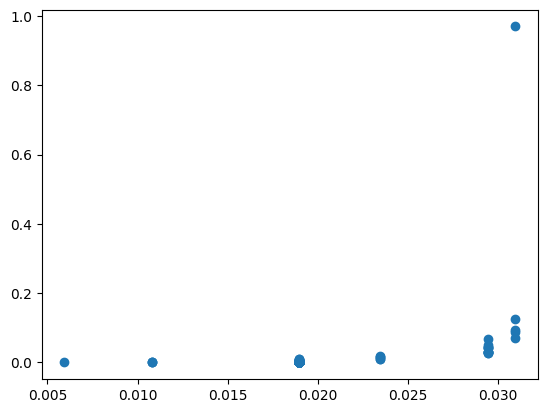

2022-08-26 05:28:00.535 | INFO     | src.autograd_mds:run_monoreg:194 - FIRST DIFFS:
[0.00487390149408707, 0.0, 0.0, 0.008178152292589875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.004495342844221564, 0.0, 0.0, 0.0, 0.0, 0.00

Sstar: 0.9588299232061954
Tstar: 0.9999999999999998
stress: 0.979198612747279
Sstar: Autograd ArrayBox with value 1.0378104505758279
Tstar: 0.9999999999999998


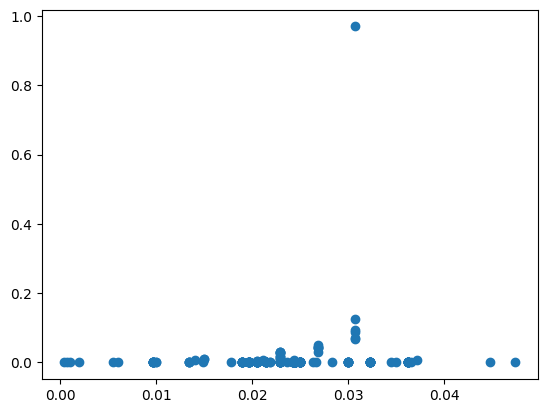

2022-08-26 05:28:01.232 | INFO     | src.autograd_mds:apply_mean:165 - PRED_DIS_OUT:
2022-08-26 05:28:01.233 | INFO     | src.autograd_mds:apply_mean:166 - [0.03000059476906619, 0.03000059476906619, 0.03000059476906619, 0.03000059476906619, 0.03000059476906619, 0.03000059476906619, 0.03000059476906619, 0.005463944283890043, 0.009712831603184405, 0.009712831603184405, 0.009712831603184405, 0.009712831603184405, 0.009712831603184405, 0.009712831603184405, 0.009712831603184405, 0.009712831603184405, 0.013375240807389326, 0.013375240807389326, 0.013375240807389326, 0.013375240807389326, 0.0236401349102903, 0.03442728313910211, 0.036199295944063514, 0.036199295944063514, 0.036199295944063514, 0.036199295944063514, 0.036199295944063514, 0.036199295944063514, 0.036199295944063514, 0.036199295944063514, 0.036199295944063514, 0.036199295944063514, 0.036199295944063514, 0.036199295944063514, 0.04478223277808217, 0.019575853980091498, 0.02179761931478833, 0.02179761931478833, 0.02499248962087909,

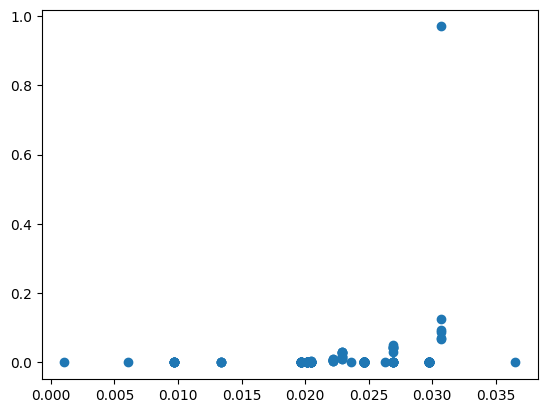

2022-08-26 05:28:01.446 | INFO     | src.autograd_mds:apply_mean:165 - PRED_DIS_OUT:
2022-08-26 05:28:01.447 | INFO     | src.autograd_mds:apply_mean:166 - [0.02693351345841917, 0.02693351345841917, 0.02693351345841917, 0.02693351345841917, 0.02693351345841917, 0.02693351345841917, 0.02693351345841917, 0.02693351345841917, 0.009712831603184405, 0.009712831603184405, 0.009712831603184405, 0.009712831603184405, 0.009712831603184405, 0.009712831603184405, 0.009712831603184405, 0.009712831603184405, 0.013375240807389326, 0.013375240807389326, 0.013375240807389326, 0.013375240807389326, 0.0236401349102903, 0.02973935950527503, 0.02973935950527503, 0.02973935950527503, 0.02973935950527503, 0.02973935950527503, 0.02973935950527503, 0.02973935950527503, 0.02973935950527503, 0.02973935950527503, 0.02973935950527503, 0.02973935950527503, 0.02973935950527503, 0.02973935950527503, 0.02973935950527503, 0.02973935950527503, 0.02973935950527503, 0.02973935950527503, 0.02973935950527503, 0.02973935950

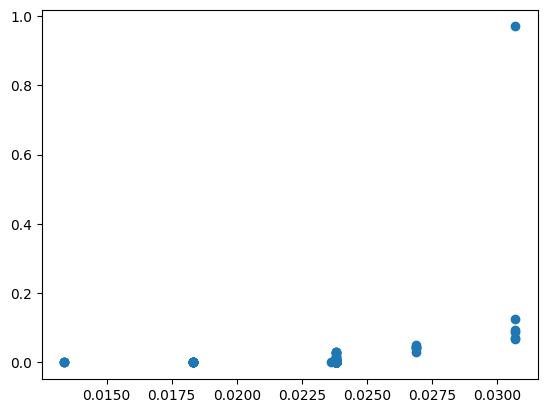

2022-08-26 05:28:01.617 | INFO     | src.autograd_mds:apply_mean:165 - PRED_DIS_OUT:
2022-08-26 05:28:01.618 | INFO     | src.autograd_mds:apply_mean:166 - [0.018323172530801787, 0.018323172530801787, 0.018323172530801787, 0.018323172530801787, 0.018323172530801787, 0.018323172530801787, 0.018323172530801787, 0.018323172530801787, 0.018323172530801787, 0.018323172530801787, 0.018323172530801787, 0.018323172530801787, 0.018323172530801787, 0.018323172530801787, 0.018323172530801787, 0.018323172530801787, 0.013375240807389326, 0.013375240807389326, 0.013375240807389326, 0.013375240807389326, 0.0236401349102903, 0.02379670890467792, 0.02379670890467792, 0.02379670890467792, 0.02379670890467792, 0.02379670890467792, 0.02379670890467792, 0.02379670890467792, 0.02379670890467792, 0.02379670890467792, 0.02379670890467792, 0.02379670890467792, 0.02379670890467792, 0.02379670890467792, 0.02379670890467792, 0.02379670890467792, 0.02379670890467792, 0.02379670890467792, 0.02379670890467792, 0.023

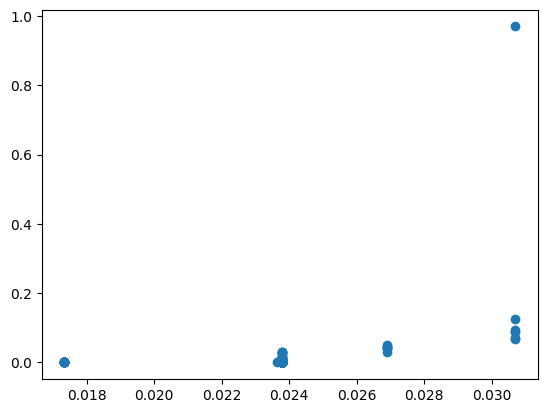

2022-08-26 05:28:01.766 | INFO     | src.autograd_mds:apply_mean:165 - PRED_DIS_OUT:
2022-08-26 05:28:01.767 | INFO     | src.autograd_mds:apply_mean:166 - [0.017333586186119295, 0.017333586186119295, 0.017333586186119295, 0.017333586186119295, 0.017333586186119295, 0.017333586186119295, 0.017333586186119295, 0.017333586186119295, 0.017333586186119295, 0.017333586186119295, 0.017333586186119295, 0.017333586186119295, 0.017333586186119295, 0.017333586186119295, 0.017333586186119295, 0.017333586186119295, 0.017333586186119295, 0.017333586186119295, 0.017333586186119295, 0.017333586186119295, 0.0236401349102903, 0.02379670890467792, 0.02379670890467792, 0.02379670890467792, 0.02379670890467792, 0.02379670890467792, 0.02379670890467792, 0.02379670890467792, 0.02379670890467792, 0.02379670890467792, 0.02379670890467792, 0.02379670890467792, 0.02379670890467792, 0.02379670890467792, 0.02379670890467792, 0.02379670890467792, 0.02379670890467792, 0.02379670890467792, 0.02379670890467792, 0.023

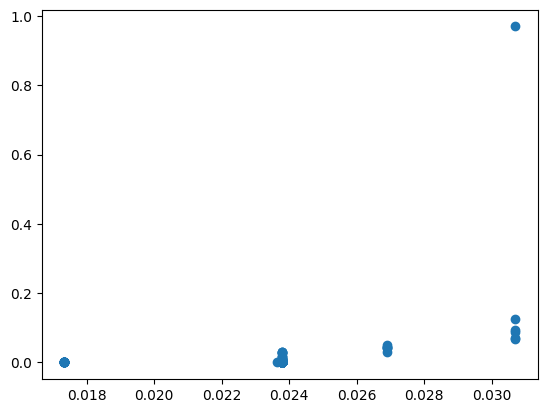

2022-08-26 05:28:01.971 | INFO     | src.autograd_mds:run_monoreg:194 - FIRST DIFFS:
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0063065487241710065, 0.00015657399438761752, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

Sstar: 0.9892485512213736
Tstar: 0.9999999999999998
stress: 0.9946097482034719
Sstar: Autograd ArrayBox with value 1.0901681957490625
Tstar: 0.9999999999999998


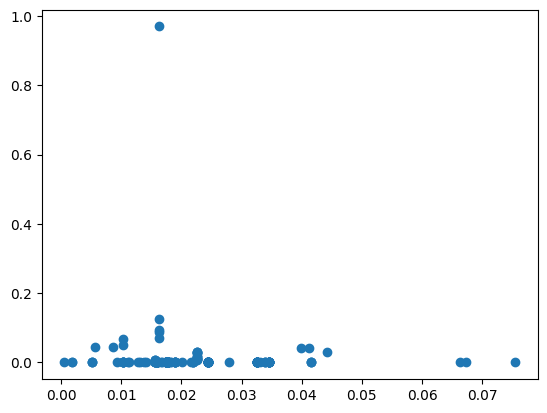

2022-08-26 05:28:02.709 | INFO     | src.autograd_mds:apply_mean:165 - PRED_DIS_OUT:
2022-08-26 05:28:02.711 | INFO     | src.autograd_mds:apply_mean:166 - [0.033957010167270214, 0.033957010167270214, 0.033957010167270214, 0.009289330355975702, 0.017741143744335133, 0.017741143744335133, 0.017741143744335133, 0.017741143744335133, 0.017741143744335133, 0.017741143744335133, 0.017741143744335133, 0.017741143744335133, 0.017741143744335133, 0.017741143744335133, 0.017741143744335133, 0.017741143744335133, 0.01885954481964834, 0.01885954481964834, 0.01885954481964834, 0.01885954481964834, 0.01885954481964834, 0.01885954481964834, 0.07548990078989326, 0.021567311834505568, 0.03253881019258563, 0.03253881019258563, 0.03253881019258563, 0.03253881019258563, 0.03253881019258563, 0.03253881019258563, 0.03253881019258563, 0.03253881019258563, 0.03253881019258563, 0.03253881019258563, 0.03253881019258563, 0.03253881019258563, 0.03253881019258563, 0.03253881019258563, 0.03253881019258563, 0.04158

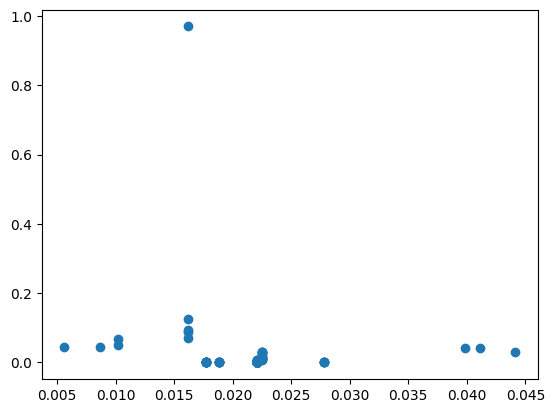

2022-08-26 05:28:02.992 | INFO     | src.autograd_mds:apply_mean:165 - PRED_DIS_OUT:
2022-08-26 05:28:02.993 | INFO     | src.autograd_mds:apply_mean:166 - [0.027790090214446585, 0.027790090214446585, 0.027790090214446585, 0.027790090214446585, 0.017741143744335133, 0.017741143744335133, 0.017741143744335133, 0.017741143744335133, 0.017741143744335133, 0.017741143744335133, 0.017741143744335133, 0.017741143744335133, 0.017741143744335133, 0.017741143744335133, 0.017741143744335133, 0.017741143744335133, 0.01885954481964834, 0.01885954481964834, 0.01885954481964834, 0.01885954481964834, 0.01885954481964834, 0.01885954481964834, 0.02206248742956754, 0.02206248742956754, 0.02206248742956754, 0.02206248742956754, 0.02206248742956754, 0.02206248742956754, 0.02206248742956754, 0.02206248742956754, 0.02206248742956754, 0.02206248742956754, 0.02206248742956754, 0.02206248742956754, 0.02206248742956754, 0.02206248742956754, 0.02206248742956754, 0.02206248742956754, 0.02206248742956754, 0.022062

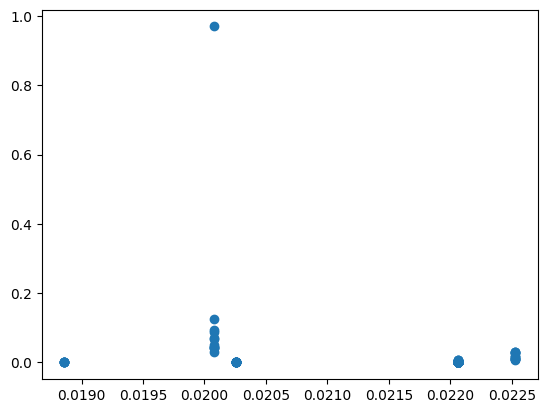

2022-08-26 05:28:03.255 | INFO     | src.autograd_mds:apply_mean:165 - PRED_DIS_OUT:
2022-08-26 05:28:03.257 | INFO     | src.autograd_mds:apply_mean:166 - [0.020253380361863, 0.020253380361863, 0.020253380361863, 0.020253380361863, 0.020253380361863, 0.020253380361863, 0.020253380361863, 0.020253380361863, 0.020253380361863, 0.020253380361863, 0.020253380361863, 0.020253380361863, 0.020253380361863, 0.020253380361863, 0.020253380361863, 0.020253380361863, 0.01885954481964834, 0.01885954481964834, 0.01885954481964834, 0.01885954481964834, 0.01885954481964834, 0.01885954481964834, 0.02206248742956754, 0.02206248742956754, 0.02206248742956754, 0.02206248742956754, 0.02206248742956754, 0.02206248742956754, 0.02206248742956754, 0.02206248742956754, 0.02206248742956754, 0.02206248742956754, 0.02206248742956754, 0.02206248742956754, 0.02206248742956754, 0.02206248742956754, 0.02206248742956754, 0.02206248742956754, 0.02206248742956754, 0.02206248742956754, 0.02206248742956754, 0.022062487429

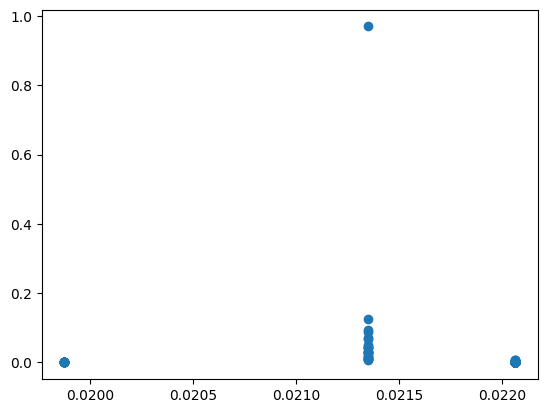

2022-08-26 05:28:03.499 | INFO     | src.autograd_mds:apply_mean:165 - PRED_DIS_OUT:
2022-08-26 05:28:03.501 | INFO     | src.autograd_mds:apply_mean:166 - [0.019873243395804447, 0.019873243395804447, 0.019873243395804447, 0.019873243395804447, 0.019873243395804447, 0.019873243395804447, 0.019873243395804447, 0.019873243395804447, 0.019873243395804447, 0.019873243395804447, 0.019873243395804447, 0.019873243395804447, 0.019873243395804447, 0.019873243395804447, 0.019873243395804447, 0.019873243395804447, 0.019873243395804447, 0.019873243395804447, 0.019873243395804447, 0.019873243395804447, 0.019873243395804447, 0.019873243395804447, 0.02206248742956754, 0.02206248742956754, 0.02206248742956754, 0.02206248742956754, 0.02206248742956754, 0.02206248742956754, 0.02206248742956754, 0.02206248742956754, 0.02206248742956754, 0.02206248742956754, 0.02206248742956754, 0.02206248742956754, 0.02206248742956754, 0.02206248742956754, 0.02206248742956754, 0.02206248742956754, 0.02206248742956754, 0.

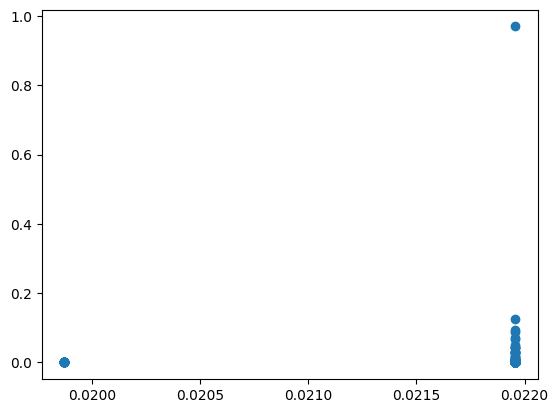

2022-08-26 05:28:03.740 | INFO     | src.autograd_mds:apply_mean:165 - PRED_DIS_OUT:
2022-08-26 05:28:03.742 | INFO     | src.autograd_mds:apply_mean:166 - [0.019873243395804447, 0.019873243395804447, 0.019873243395804447, 0.019873243395804447, 0.019873243395804447, 0.019873243395804447, 0.019873243395804447, 0.019873243395804447, 0.019873243395804447, 0.019873243395804447, 0.019873243395804447, 0.019873243395804447, 0.019873243395804447, 0.019873243395804447, 0.019873243395804447, 0.019873243395804447, 0.019873243395804447, 0.019873243395804447, 0.019873243395804447, 0.019873243395804447, 0.019873243395804447, 0.019873243395804447, 0.02195649918392289, 0.02195649918392289, 0.02195649918392289, 0.02195649918392289, 0.02195649918392289, 0.02195649918392289, 0.02195649918392289, 0.02195649918392289, 0.02195649918392289, 0.02195649918392289, 0.02195649918392289, 0.02195649918392289, 0.02195649918392289, 0.02195649918392289, 0.02195649918392289, 0.02195649918392289, 0.02195649918392289, 0.

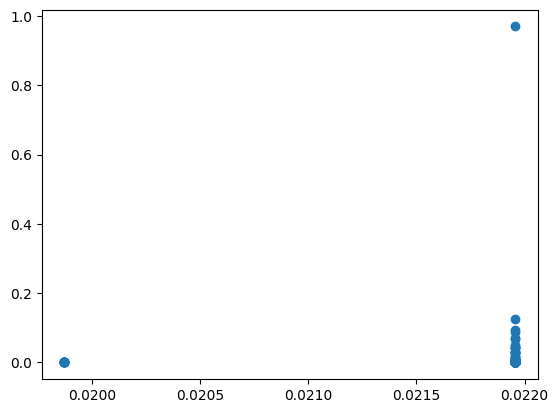

2022-08-26 05:28:04.127 | INFO     | src.autograd_mds:run_monoreg:194 - FIRST DIFFS:
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0020832557881184446, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

Sstar: 1.001948057347289
Tstar: 0.9999999999999998
stress: 1.0009735547692002
Sstar: Autograd ArrayBox with value 1.1047560278842674
Tstar: 0.9999999999999998


In [15]:
combi_config = my_mds_training_loop(dissimilarities, n_init=10, eps=1.5)
    

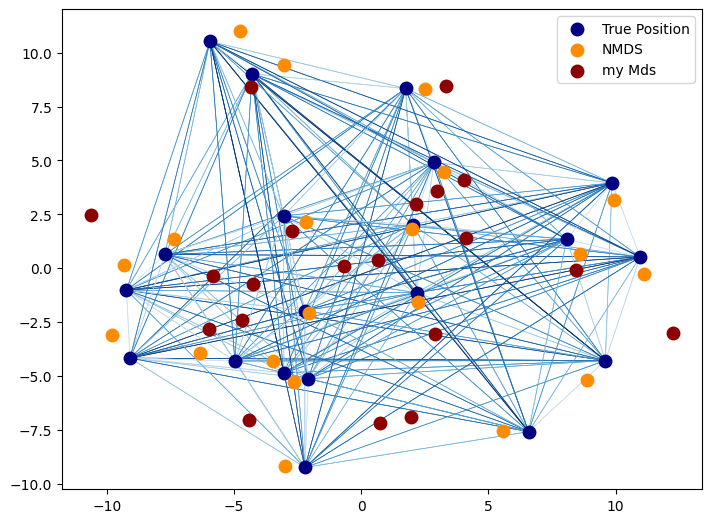

In [16]:
npos *= np.sqrt((X_true**2).sum()) / np.sqrt((npos**2).sum())
combi_config *= np.sqrt((X_true**2).sum()) / np.sqrt((combi_config**2).sum())
# Rotate the data
clf = PCA(n_components=2)
X_true = clf.fit_transform(X_true)


npos = clf.fit_transform(npos)
combi_config = clf.fit_transform(combi_config)

fig = plt.figure(1)
ax = plt.axes([0.0, 0.0, 1.0, 1.0])

s = 100
plt.scatter(X_true[:, 0], X_true[:, 1], color="navy", s=s, lw=0, label="True Position")
plt.scatter(npos[:, 0], npos[:, 1], color="darkorange", s=s, lw=0, label="NMDS")
plt.scatter(combi_config[:, 0], combi_config[:, 1], color="darkred", s=s, lw=0, label="my Mds")
plt.legend(scatterpoints=1, loc="best", shadow=False)

similarities = similarities.max() / (similarities + EPSILON) * 100
np.fill_diagonal(similarities, 0)
# Plot the edges
start_idx, end_idx = np.where(npos)
# a sequence of (*line0*, *line1*, *line2*), where::
#            linen = (x0, y0), (x1, y1), ... (xm, ym)
segments = [
    [X_true[i, :], X_true[j, :]] for i in range(len(npos)) for j in range(len(npos))
]
values = np.abs(similarities)
lc = LineCollection(
    segments, zorder=0, cmap=plt.cm.Blues, norm=plt.Normalize(0, values.max())
)
lc.set_array(similarities.flatten())
lc.set_linewidths(np.full(len(segments), 0.5))
ax.add_collection(lc)

plt.show()

In [17]:
combi_config

array([[ -5.83768957,  -0.36171437],
       [ 12.2535608 ,  -2.99677959],
       [  0.72966951,  -7.20128626],
       [  2.97546535,   3.59930033],
       [ -2.71102189,   1.74189658],
       [  4.11172054,   1.41433353],
       [-10.6154177 ,   2.44967544],
       [ -4.40424194,  -7.03117672],
       [  4.02361316,   4.10948833],
       [ -5.99156165,  -2.81975354],
       [  3.32096237,   8.43545237],
       [  2.16285983,   2.99365703],
       [  8.4213392 ,  -0.10574244],
       [  2.88646408,  -3.03682547],
       [  1.95806665,  -6.90691807],
       [ -4.26865307,  -0.72655316],
       [ -4.70040262,  -2.40961497],
       [ -4.31851821,   8.39554338],
       [  0.67698082,   0.36832476],
       [ -0.67319569,   0.08869286]])